In [1]:
import pandas as pd
import seaborn as sns 
sns.set(color_codes=True)
import numpy as np
from matplotlib import pyplot as plt 
from sklearn import preprocessing
from sklearn.metrics import recall_score
from sklearn.preprocessing import LabelEncoder

*Data Preprocessing*

In [2]:
df = pd.read_csv('GOT_Transform_Batch2_v1.csv',low_memory=False)

In [3]:
df.head()

,MAX_STRM_id,GOT2,NewID,ACAD_CAREER,PROG_STATUS,PROG_ACTION,STATUS_DT,ADMIT_TERM,BEGIN_DT,END_DT,...,T16:UNT_PASSD_GPA,T16:UNT_PASSD_NOGPA,T16:TOT_PASSD_GPA,T17:CUR_GPA,T17:CUM_GPA,T17:UNT_TAKEN_GPA,T17:UNT_TAKEN_NOGPA,T17:UNT_PASSD_GPA,T17:UNT_PASSD_NOGPA,T17:TOT_PASSD_GPA
0,1,N,G1002156,DIPL,DC,DISC,"Wednesday, 30 August, 2017",1710,"Monday, 3 July, 2017","Sunday, 5 July, 2020",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,N,G1006410,UGRD,DC,DISC,"Monday, 2 April, 2018",1720,"Monday, 20 November, 2017","Sunday, 2 January, 2022",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,N,G1012310,UGRD,DC,DISC,"Tuesday, 3 July, 2018",1720,"Monday, 20 November, 2017","Sunday, 2 January, 2022",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,N,G1008772,UGRD,DC,DISC,"Monday, 9 April, 2018",1720,"Monday, 20 November, 2017","Sunday, 2 January, 2022",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,N,G1001858,UGRD,DC,DISC,"Thursday, 25 January, 2018",1720,"Monday, 20 November, 2017","Sunday, 2 January, 2022",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df2=df.loc[:, df.columns.drop(['TRNSCR_DESCR', 'MUET','IELTS','NewID'])]
df2.head()

,MAX_STRM_id,GOT2,ACAD_CAREER,PROG_STATUS,PROG_ACTION,STATUS_DT,ADMIT_TERM,BEGIN_DT,END_DT,EXP_GRAD_TERM,...,T16:UNT_PASSD_GPA,T16:UNT_PASSD_NOGPA,T16:TOT_PASSD_GPA,T17:CUR_GPA,T17:CUM_GPA,T17:UNT_TAKEN_GPA,T17:UNT_TAKEN_NOGPA,T17:UNT_PASSD_GPA,T17:UNT_PASSD_NOGPA,T17:TOT_PASSD_GPA
0,1,N,DIPL,DC,DISC,"Wednesday, 30 August, 2017",1710,"Monday, 3 July, 2017","Sunday, 5 July, 2020",1930.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,N,UGRD,DC,DISC,"Monday, 2 April, 2018",1720,"Monday, 20 November, 2017","Sunday, 2 January, 2022",2110.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,N,UGRD,DC,DISC,"Tuesday, 3 July, 2018",1720,"Monday, 20 November, 2017","Sunday, 2 January, 2022",2110.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,N,UGRD,DC,DISC,"Monday, 9 April, 2018",1720,"Monday, 20 November, 2017","Sunday, 2 January, 2022",2110.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,N,UGRD,DC,DISC,"Thursday, 25 January, 2018",1720,"Monday, 20 November, 2017","Sunday, 2 January, 2022",2110.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df2.isnull().sum()

MAX_STRM_id                  0
GOT2                         0
ACAD_CAREER                  0
PROG_STATUS                  0
PROG_ACTION                  0
STATUS_DT                    0
ADMIT_TERM                   0
BEGIN_DT                     0
END_DT                      39
EXP_GRAD_TERM               39
CAMPUS                       0
SAD_LOAD_DESCR               0
ACAD_PLAN                    0
ACAD_PROG_DESCR              0
ACAD_ORG                     0
DISABILITY                   3
NATIONALITY                  0
RACE                         2
SEX                          0
LOAN                      5437
SPONSOR                   4944
SCHOLAR                   5465
TOT_CUMULATIVE               0
N_FINAL_RSLT_DESCR           1
N_HONOUR_DESCR              86
CREDITREQUIRED               1
CNT_DISC                  5089
INFO1                      195
CUMM_UNT_PASSD_NOGPA         0
TOT_TRNSFR                4355
MAX_TOT_PASSD_GPA            0
LATEST_CH_PASSD              0
MAX_STRM

In [6]:
df.PROG_STATUS.value_counts()

CM    3544
AC     938
DC     390
DM     299
CN     292
LA      25
Name: PROG_STATUS, dtype: int64

In [7]:
df.columns.tolist()

['MAX_STRM_id',
 'GOT2',
 'NewID',
 'ACAD_CAREER',
 'PROG_STATUS',
 'PROG_ACTION',
 'STATUS_DT',
 'ADMIT_TERM',
 'BEGIN_DT',
 'END_DT',
 'EXP_GRAD_TERM',
 'CAMPUS',
 'SAD_LOAD_DESCR',
 'ACAD_PLAN',
 'ACAD_PROG_DESCR',
 'TRNSCR_DESCR',
 'ACAD_ORG',
 'DISABILITY',
 'NATIONALITY',
 'RACE',
 'SEX',
 'MUET',
 'IELTS',
 'LOAN',
 'SPONSOR',
 'SCHOLAR',
 'TOT_CUMULATIVE',
 'N_FINAL_RSLT_DESCR',
 'N_HONOUR_DESCR',
 'CREDITREQUIRED',
 'CNT_DISC',
 'INFO1',
 'CUMM_UNT_PASSD_NOGPA',
 'TOT_TRNSFR',
 'MAX_TOT_PASSD_GPA',
 'LATEST_CH_PASSD',
 'MAX_STRM',
 'SUM_UNT_PASSD_GPA',
 'Prog_Length(Trimester)',
 'T1:CUR_GPA',
 'T1:CUM_GPA',
 'T1:UNT_TAKEN_GPA',
 'T1:UNT_TAKEN_NOGPA',
 'T1:UNT_PASSD_GPA',
 'T1:UNT_PASSD_NOGPA',
 'T1:TOT_PASSD_GPA',
 'T2:CUR_GPA',
 'T2:CUM_GPA',
 'T2:UNT_TAKEN_GPA',
 'T2:UNT_TAKEN_NOGPA',
 'T2:UNT_PASSD_GPA',
 'T2:UNT_PASSD_NOGPA',
 'T2:TOT_PASSD_GPA',
 'T3:CUR_GPA',
 'T3:CUM_GPA',
 'T3:UNT_TAKEN_GPA',
 'T3:UNT_TAKEN_NOGPA',
 'T3:UNT_PASSD_GPA',
 'T3:UNT_PASSD_NOGPA',
 'T3:TOT_

In [8]:

# Using DataFrame.loc[] create new DataFrame by specific column.
df2=df.loc[:, df.columns.drop(['TRNSCR_DESCR', 'MUET','IELTS','NewID'])]
df2.head()


,MAX_STRM_id,GOT2,ACAD_CAREER,PROG_STATUS,PROG_ACTION,STATUS_DT,ADMIT_TERM,BEGIN_DT,END_DT,EXP_GRAD_TERM,CAMPUS,SAD_LOAD_DESCR,ACAD_PLAN,ACAD_PROG_DESCR,ACAD_ORG,DISABILITY,NATIONALITY,RACE,SEX,LOAN,SPONSOR,SCHOLAR,TOT_CUMULATIVE,N_FINAL_RSLT_DESCR,N_HONOUR_DESCR,CREDITREQUIRED,CNT_DISC,INFO1,CUMM_UNT_PASSD_NOGPA,TOT_TRNSFR,MAX_TOT_PASSD_GPA,LATEST_CH_PASSD,MAX_STRM,SUM_UNT_PASSD_GPA,Prog_Length(Trimester),T1:CUR_GPA,T1:CUM_GPA,T1:UNT_TAKEN_GPA,T1:UNT_TAKEN_NOGPA,T1:UNT_PASSD_GPA,T1:UNT_PASSD_NOGPA,T1:TOT_PASSD_GPA,T2:CUR_GPA,T2:CUM_GPA,T2:UNT_TAKEN_GPA,T2:UNT_TAKEN_NOGPA,T2:UNT_PASSD_GPA,T2:UNT_PASSD_NOGPA,T2:TOT_PASSD_GPA,T3:CUR_GPA,T3:CUM_GPA,T3:UNT_TAKEN_GPA,T3:UNT_TAKEN_NOGPA,T3:UNT_PASSD_GPA,T3:UNT_PASSD_NOGPA,T3:TOT_PASSD_GPA,T4:CUR_GPA,T4:CUM_GPA,T4:UNT_TAKEN_GPA,T4:UNT_TAKEN_NOGPA,T4:UNT_PASSD_GPA,T4:UNT_PASSD_NOGPA,T4:TOT_PASSD_GPA,T5:CUR_GPA,T5:CUM_GPA,T5:UNT_TAKEN_GPA,T5:UNT_TAKEN_NOGPA,T5:UNT_PASSD_GPA,T5:UNT_PASSD_NOGPA,T5:TOT_PASSD_GPA,T6:CUR_GPA,T6:CUM_GPA,T6:UNT_TAKEN_GPA,T6:UNT_TAKEN_NOGPA,T6:UNT_PASSD_GPA,T6:UNT_PASSD_NOGPA,T6:TOT_PASSD_GPA,T7:CUR_GPA,T7:CUM_GPA,T7:UNT_TAKEN_GPA,T7:UNT_TAKEN_NOGPA,T7:UNT_PASSD_GPA,T7:UNT_PASSD_NOGPA,T7:TOT_PASSD_GPA,T8:CUR_GPA,T8:CUM_GPA,T8:UNT_TAKEN_GPA,T8:UNT_TAKEN_NOGPA,T8:UNT_PASSD_GPA,T8:UNT_PASSD_NOGPA,T8:TOT_PASSD_GPA,T9:CUR_GPA,T9:CUM_GPA,T9:UNT_TAKEN_GPA,T9:UNT_TAKEN_NOGPA,T9:UNT_PASSD_GPA,T9:UNT_PASSD_NOGPA,T9:TOT_PASSD_GPA,T10:CUR_GPA,T10:CUM_GPA,T10:UNT_TAKEN_GPA,T10:UNT_TAKEN_NOGPA,T10:UNT_PASSD_GPA,T10:UNT_PASSD_NOGPA,T10:TOT_PASSD_GPA,T11:CUR_GPA,T11:CUM_GPA,T11:UNT_TAKEN_GPA,T11:UNT_TAKEN_NOGPA,T11:UNT_PASSD_GPA,T11:UNT_PASSD_NOGPA,T11:TOT_PASSD_GPA,T12:CUR_GPA,T12:CUM_GPA,T12:UNT_TAKEN_GPA,T12:UNT_TAKEN_NOGPA,T12:UNT_PASSD_GPA,T12:UNT_PASSD_NOGPA,T12:TOT_PASSD_GPA,T13:CUR_GPA,T13:CUM_GPA,T13:UNT_TAKEN_GPA,T13:UNT_TAKEN_NOGPA,T13:UNT_PASSD_GPA,T13:UNT_PASSD_NOGPA,T13:TOT_PASSD_GPA,T14:CUR_GPA,T14:CUM_GPA,T14:UNT_TAKEN_GPA,T14:UNT_TAKEN_NOGPA,T14:UNT_PASSD_GPA,T14:UNT_PASSD_NOGPA,T14:TOT_PASSD_GPA,T15:CUR_GPA,T15:CUM_GPA,T15:UNT_TAKEN_GPA,T15:UNT_TAKEN_NOGPA,T15:UNT_PASSD_GPA,T15:UNT_PASSD_NOGPA,T15:TOT_PASSD_GPA,T16:CUR_GPA,T16:CUM_GPA,T16:UNT_TAKEN_GPA,T16:UNT_TAKEN_NOGPA,T16:UNT_PASSD_GPA,T16:UNT_PASSD_NOGPA,T16:TOT_PASSD_GPA,T17:CUR_GPA,T17:CUM_GPA,T17:UNT_TAKEN_GPA,T17:UNT_TAKEN_NOGPA,T17:UNT_PASSD_GPA,T17:UNT_PASSD_NOGPA,T17:TOT_PASSD_GPA
0,1,N,DIPL,DC,DISC,"Wednesday, 30 August, 2017",1710,"Monday, 3 July, 2017","Sunday, 5 July, 2020",1930.0,MLAKA,Full-Time,DD12,Dip. Bus. Admin.,FOB,No disability,Malaysia,CHINESE,M,NaN,NaN,NaN,0,NO GPA,NaN,91.0,1.0,NaN,0,NaN,0,0,1710,0,6,0.00,0.00,0,6,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,N,UGRD,DC,DISC,"Monday, 2 April, 2018",1720,"Monday, 20 November, 2017","Sunday, 2 January, 2022",2110.0,MLAKA,Full-Time,AB01,B.Acc. (Hons),FOB,No disability,Malaysia,CHINESE,F,NaN,NaN,NaN,8,PROBATION,Less 2,146.0,1.0,NaN,5,25.0,3,33,1720,3,12,1.47,1.47,10,8,3,5,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,N,UGRD,DC,DISC,"Tuesday, 3 July, 2018",1720,"Monday, 20 November, 2017","Sunday, 2 January, 2022",2110.0,MLAKA,Full-Time,AB01,B.Acc. (Hons),FOB,No disability,Malaysia,CHINESE,M,NaN,NaN,NaN,27,PASS,Second Class Honours (L

In [9]:
df.SPONSOR.value_counts()

Yayasan Telekom Malaysia                          298
Jabatan Perkhidmatan Awam                         167
Kingdom of Saudi Arabia                            11
Lembaga Zakat Selangor (MAIS)                       9
Rhizophora-MMU Cinematic Arts Scholarship Fund      8
BIASISWA IBNU HAITHAM (YUM)                         8
Permodalan Nasional Berhad                          7
YUM President Scholarship                           7
Maybank Scholarship                                 5
JOHOR CORPORATION                                   5
Biasiswa Malaysia Airport Holdings Berhad           3
Sarawak Energy Scholarship                          3
YAYASAN DAYADIRI                                    2
Yayasan Khazanah                                    2
Housing Development Corporation Ltd                 1
Kementerian Pendidikan Malaysia                     1
Crowe Malaysia                                      1
SKIM BIASISWA TABUNG HAJI                           1
WUHAN FIBERHOME INTERNATIONA

In [10]:
PROG_STATUS ={
    'CM':1,
    'AC':1,
    'DC':0,
    'DM':0,
    'CN':0,
    'LA':0
}

df2['PROG_STATUS'].replace(PROG_STATUS,inplace=True)
df2['PROG_STATUS'].astype(str).astype(int)
df2['PROG_STATUS']

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      1
14      1
15      1
16      1
17      1
18      0
19      1
20      1
21      1
22      1
23      1
24      1
25      0
26      0
27      1
28      0
29      1
30      0
31      1
32      1
33      1
34      1
35      1
36      0
37      1
38      1
39      0
40      0
41      1
42      0
43      1
44      1
45      1
46      1
47      0
48      1
49      0
50      0
51      1
52      1
53      0
54      0
55      0
56      1
57      0
58      0
59      0
60      1
61      1
62      1
63      1
64      1
65      1
66      1
67      1
68      0
69      1
70      1
71      0
72      0
73      0
74      1
75      1
76      1
77      0
78      1
79      1
80      0
81      1
82      1
83      1
84      1
85      1
86      1
87      1
88      1
89      1
90      1
91      0
92      0
93      0
94      0
95      0
96      1
97      0
98      0
99      0


In [11]:
df.dtypes

MAX_STRM_id                 int64
GOT2                       object
NewID                      object
ACAD_CAREER                object
PROG_STATUS                object
PROG_ACTION                object
STATUS_DT                  object
ADMIT_TERM                  int64
BEGIN_DT                   object
END_DT                     object
EXP_GRAD_TERM             float64
CAMPUS                     object
SAD_LOAD_DESCR             object
ACAD_PLAN                  object
ACAD_PROG_DESCR            object
TRNSCR_DESCR               object
ACAD_ORG                   object
DISABILITY                 object
NATIONALITY                object
RACE                       object
SEX                        object
MUET                      float64
IELTS                     float64
LOAN                       object
SPONSOR                    object
SCHOLAR                    object
TOT_CUMULATIVE              int64
N_FINAL_RSLT_DESCR         object
N_HONOUR_DESCR             object
CREDITREQUIRED

In [12]:
df2.select_dtypes(include = "float64").columns

Index(['EXP_GRAD_TERM', 'CREDITREQUIRED', 'CNT_DISC', 'TOT_TRNSFR',
       'T1:CUR_GPA', 'T1:CUM_GPA', 'T2:CUR_GPA', 'T2:CUM_GPA',
       'T2:UNT_TAKEN_GPA', 'T2:UNT_TAKEN_NOGPA',
       ...
       'T16:UNT_PASSD_GPA', 'T16:UNT_PASSD_NOGPA', 'T16:TOT_PASSD_GPA',
       'T17:CUR_GPA', 'T17:CUM_GPA', 'T17:UNT_TAKEN_GPA',
       'T17:UNT_TAKEN_NOGPA', 'T17:UNT_PASSD_GPA', 'T17:UNT_PASSD_NOGPA',
       'T17:TOT_PASSD_GPA'],
      dtype='object', length=118)

In [13]:
objList2 = df2.select_dtypes(include = "object").columns
print (objList2)
df2[objList2].isnull().sum()

Index(['GOT2', 'ACAD_CAREER', 'PROG_ACTION', 'STATUS_DT', 'BEGIN_DT', 'END_DT',
       'CAMPUS', 'SAD_LOAD_DESCR', 'ACAD_PLAN', 'ACAD_PROG_DESCR', 'ACAD_ORG',
       'DISABILITY', 'NATIONALITY', 'RACE', 'SEX', 'LOAN', 'SPONSOR',
       'SCHOLAR', 'N_FINAL_RSLT_DESCR', 'N_HONOUR_DESCR', 'INFO1'],
      dtype='object')


GOT2                     0
ACAD_CAREER              0
PROG_ACTION              0
STATUS_DT                0
BEGIN_DT                 0
END_DT                  39
CAMPUS                   0
SAD_LOAD_DESCR           0
ACAD_PLAN                0
ACAD_PROG_DESCR          0
ACAD_ORG                 0
DISABILITY               3
NATIONALITY              0
RACE                     2
SEX                      0
LOAN                  5437
SPONSOR               4944
SCHOLAR               5465
N_FINAL_RSLT_DESCR       1
N_HONOUR_DESCR          86
INFO1                  195
dtype: int64

In [14]:
objList3 = df2.select_dtypes(include = "float64").columns
df2[objList3].isnull().sum()

EXP_GRAD_TERM            39
CREDITREQUIRED            1
CNT_DISC               5089
TOT_TRNSFR             4355
T1:CUR_GPA                0
T1:CUM_GPA                0
T2:CUR_GPA              373
T2:CUM_GPA              373
T2:UNT_TAKEN_GPA        373
T2:UNT_TAKEN_NOGPA      373
T2:UNT_PASSD_GPA        373
T2:UNT_PASSD_NOGPA      373
T2:TOT_PASSD_GPA        373
T3:CUR_GPA              675
T3:CUM_GPA              675
T3:UNT_TAKEN_GPA        675
T3:UNT_TAKEN_NOGPA      675
T3:UNT_PASSD_GPA        675
T3:UNT_PASSD_NOGPA      675
T3:TOT_PASSD_GPA        675
T4:CUR_GPA              877
T4:CUM_GPA              877
T4:UNT_TAKEN_GPA        877
T4:UNT_TAKEN_NOGPA      877
T4:UNT_PASSD_GPA        877
T4:UNT_PASSD_NOGPA      877
T4:TOT_PASSD_GPA        877
T5:CUR_GPA              970
T5:CUM_GPA              970
T5:UNT_TAKEN_GPA        970
T5:UNT_TAKEN_NOGPA      970
T5:UNT_PASSD_GPA        970
T5:UNT_PASSD_NOGPA      970
T5:TOT_PASSD_GPA        970
T6:CUR_GPA             1036
T6:CUM_GPA          

In [15]:
df2[objList3] = df2[objList3].fillna(0)
df2[objList3].isnull().sum()

EXP_GRAD_TERM          0
CREDITREQUIRED         0
CNT_DISC               0
TOT_TRNSFR             0
T1:CUR_GPA             0
T1:CUM_GPA             0
T2:CUR_GPA             0
T2:CUM_GPA             0
T2:UNT_TAKEN_GPA       0
T2:UNT_TAKEN_NOGPA     0
T2:UNT_PASSD_GPA       0
T2:UNT_PASSD_NOGPA     0
T2:TOT_PASSD_GPA       0
T3:CUR_GPA             0
T3:CUM_GPA             0
T3:UNT_TAKEN_GPA       0
T3:UNT_TAKEN_NOGPA     0
T3:UNT_PASSD_GPA       0
T3:UNT_PASSD_NOGPA     0
T3:TOT_PASSD_GPA       0
T4:CUR_GPA             0
T4:CUM_GPA             0
T4:UNT_TAKEN_GPA       0
T4:UNT_TAKEN_NOGPA     0
T4:UNT_PASSD_GPA       0
T4:UNT_PASSD_NOGPA     0
T4:TOT_PASSD_GPA       0
T5:CUR_GPA             0
T5:CUM_GPA             0
T5:UNT_TAKEN_GPA       0
T5:UNT_TAKEN_NOGPA     0
T5:UNT_PASSD_GPA       0
T5:UNT_PASSD_NOGPA     0
T5:TOT_PASSD_GPA       0
T6:CUR_GPA             0
T6:CUM_GPA             0
T6:UNT_TAKEN_GPA       0
T6:UNT_TAKEN_NOGPA     0
T6:UNT_PASSD_GPA       0
T6:UNT_PASSD_NOGPA     0


*Label Encoding*

In [16]:

le = LabelEncoder()

for feat in objList2:
    df2[feat] = le.fit_transform(df2[feat].astype(str))

print (df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5488 entries, 0 to 5487
Columns: 154 entries, MAX_STRM_id to T17:TOT_PASSD_GPA
dtypes: float64(118), int32(21), int64(15)
memory usage: 6.0 MB
None


In [17]:
df2.head()

,MAX_STRM_id,GOT2,ACAD_CAREER,PROG_STATUS,PROG_ACTION,STATUS_DT,ADMIT_TERM,BEGIN_DT,END_DT,EXP_GRAD_TERM,CAMPUS,SAD_LOAD_DESCR,ACAD_PLAN,ACAD_PROG_DESCR,ACAD_ORG,DISABILITY,NATIONALITY,RACE,SEX,LOAN,SPONSOR,SCHOLAR,TOT_CUMULATIVE,N_FINAL_RSLT_DESCR,N_HONOUR_DESCR,CREDITREQUIRED,CNT_DISC,INFO1,CUMM_UNT_PASSD_NOGPA,TOT_TRNSFR,MAX_TOT_PASSD_GPA,LATEST_CH_PASSD,MAX_STRM,SUM_UNT_PASSD_GPA,Prog_Length(Trimester),T1:CUR_GPA,T1:CUM_GPA,T1:UNT_TAKEN_GPA,T1:UNT_TAKEN_NOGPA,T1:UNT_PASSD_GPA,T1:UNT_PASSD_NOGPA,T1:TOT_PASSD_GPA,T2:CUR_GPA,T2:CUM_GPA,T2:UNT_TAKEN_GPA,T2:UNT_TAKEN_NOGPA,T2:UNT_PASSD_GPA,T2:UNT_PASSD_NOGPA,T2:TOT_PASSD_GPA,T3:CUR_GPA,T3:CUM_GPA,T3:UNT_TAKEN_GPA,T3:UNT_TAKEN_NOGPA,T3:UNT_PASSD_GPA,T3:UNT_PASSD_NOGPA,T3:TOT_PASSD_GPA,T4:CUR_GPA,T4:CUM_GPA,T4:UNT_TAKEN_GPA,T4:UNT_TAKEN_NOGPA,T4:UNT_PASSD_GPA,T4:UNT_PASSD_NOGPA,T4:TOT_PASSD_GPA,T5:CUR_GPA,T5:CUM_GPA,T5:UNT_TAKEN_GPA,T5:UNT_TAKEN_NOGPA,T5:UNT_PASSD_GPA,T5:UNT_PASSD_NOGPA,T5:TOT_PASSD_GPA,T6:CUR_GPA,T6:CUM_GPA,T6:UNT_TAKEN_GPA,T6:UNT_TAKEN_NOGPA,T6:UNT_PASSD_GPA,T6:UNT_PASSD_NOGPA,T6:TOT_PASSD_GPA,T7:CUR_GPA,T7:CUM_GPA,T7:UNT_TAKEN_GPA,T7:UNT_TAKEN_NOGPA,T7:UNT_PASSD_GPA,T7:UNT_PASSD_NOGPA,T7:TOT_PASSD_GPA,T8:CUR_GPA,T8:CUM_GPA,T8:UNT_TAKEN_GPA,T8:UNT_TAKEN_NOGPA,T8:UNT_PASSD_GPA,T8:UNT_PASSD_NOGPA,T8:TOT_PASSD_GPA,T9:CUR_GPA,T9:CUM_GPA,T9:UNT_TAKEN_GPA,T9:UNT_TAKEN_NOGPA,T9:UNT_PASSD_GPA,T9:UNT_PASSD_NOGPA,T9:TOT_PASSD_GPA,T10:CUR_GPA,T10:CUM_GPA,T10:UNT_TAKEN_GPA,T10:UNT_TAKEN_NOGPA,T10:UNT_PASSD_GPA,T10:UNT_PASSD_NOGPA,T10:TOT_PASSD_GPA,T11:CUR_GPA,T11:CUM_GPA,T11:UNT_TAKEN_GPA,T11:UNT_TAKEN_NOGPA,T11:UNT_PASSD_GPA,T11:UNT_PASSD_NOGPA,T11:TOT_PASSD_GPA,T12:CUR_GPA,T12:CUM_GPA,T12:UNT_TAKEN_GPA,T12:UNT_TAKEN_NOGPA,T12:UNT_PASSD_GPA,T12:UNT_PASSD_NOGPA,T12:TOT_PASSD_GPA,T13:CUR_GPA,T13:CUM_GPA,T13:UNT_TAKEN_GPA,T13:UNT_TAKEN_NOGPA,T13:UNT_PASSD_GPA,T13:UNT_PASSD_NOGPA,T13:TOT_PASSD_GPA,T14:CUR_GPA,T14:CUM_GPA,T14:UNT_TAKEN_GPA,T14:UNT_TAKEN_NOGPA,T14:UNT_PASSD_GPA,T14:UNT_PASSD_NOGPA,T14:TOT_PASSD_GPA,T15:CUR_GPA,T15:CUM_GPA,T15:UNT_TAKEN_GPA,T15:UNT_TAKEN_NOGPA,T15:UNT_PASSD_GPA,T15:UNT_PASSD_NOGPA,T15:TOT_PASSD_GPA,T16:CUR_GPA,T16:CUM_GPA,T16:UNT_TAKEN_GPA,T16:UNT_TAKEN_NOGPA,T16:UNT_PASSD_GPA,T16:UNT_PASSD_NOGPA,T16:TOT_PASSD_GPA,T17:CUR_GPA,T17:CUM_GPA,T17:UNT_TAKEN_GPA,T17:UNT_TAKEN_NOGPA,T17:UNT_PASSD_GPA,T17:UNT_PASSD_NOGPA,T17:TOT_PASSD_GPA
0,1,0,0,0,3,458,1710,4,18,1930.0,1,0,27,45,5,3,18,3,1,1,23,3,0,0,8,91.0,1.0,3750,0,0.0,0,0,1710,0,6,0.00,0.00,0,6,0,0,0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,3,0,3,129,1720,2,10,2110.0,1,0,0,5,5,3,18,3,0,1,23,3,8,2,3,146.0,1.0,3750,5,25.0,3,33,1720,3,12,1.47,1.47,10,8,3,5,3,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0,3,0,3,369,1720,2,10,2110.0,1,0,0,5,5,3,18,3,1,1,23,3,27,1,5,146.0,1.0,3750,11,23.0,16,50,1730,16,12,3.01,3.01,10,8,10,8,10,2.27,2.73,6.0,3.0,6.0,3.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [18]:
df_drop_unuse = df2.drop(['MAX_STRM_id', 'GOT2', 'PROG_ACTION', 'STATUS_DT', 'END_DT', 'CNT_DISC','INFO1','Prog_Length(Trimester)','TOT_CUMULATIVE','N_FINAL_RSLT_DESCR','N_HONOUR_DESCR'], axis=1)
df_drop_unuse.head()

,ACAD_CAREER,PROG_STATUS,ADMIT_TERM,BEGIN_DT,EXP_GRAD_TERM,CAMPUS,SAD_LOAD_DESCR,ACAD_PLAN,ACAD_PROG_DESCR,ACAD_ORG,DISABILITY,NATIONALITY,RACE,SEX,LOAN,SPONSOR,SCHOLAR,CREDITREQUIRED,CUMM_UNT_PASSD_NOGPA,TOT_TRNSFR,MAX_TOT_PASSD_GPA,LATEST_CH_PASSD,MAX_STRM,SUM_UNT_PASSD_GPA,T1:CUR_GPA,T1:CUM_GPA,T1:UNT_TAKEN_GPA,T1:UNT_TAKEN_NOGPA,T1:UNT_PASSD_GPA,T1:UNT_PASSD_NOGPA,T1:TOT_PASSD_GPA,T2:CUR_GPA,T2:CUM_GPA,T2:UNT_TAKEN_GPA,T2:UNT_TAKEN_NOGPA,T2:UNT_PASSD_GPA,T2:UNT_PASSD_NOGPA,T2:TOT_PASSD_GPA,T3:CUR_GPA,T3:CUM_GPA,T3:UNT_TAKEN_GPA,T3:UNT_TAKEN_NOGPA,T3:UNT_PASSD_GPA,T3:UNT_PASSD_NOGPA,T3:TOT_PASSD_GPA,T4:CUR_GPA,T4:CUM_GPA,T4:UNT_TAKEN_GPA,T4:UNT_TAKEN_NOGPA,T4:UNT_PASSD_GPA,T4:UNT_PASSD_NOGPA,T4:TOT_PASSD_GPA,T5:CUR_GPA,T5:CUM_GPA,T5:UNT_TAKEN_GPA,T5:UNT_TAKEN_NOGPA,T5:UNT_PASSD_GPA,T5:UNT_PASSD_NOGPA,T5:TOT_PASSD_GPA,T6:CUR_GPA,T6:CUM_GPA,T6:UNT_TAKEN_GPA,T6:UNT_TAKEN_NOGPA,T6:UNT_PASSD_GPA,T6:UNT_PASSD_NOGPA,T6:TOT_PASSD_GPA,T7:CUR_GPA,T7:CUM_GPA,T7:UNT_TAKEN_GPA,T7:UNT_TAKEN_NOGPA,T7:UNT_PASSD_GPA,T7:UNT_PASSD_NOGPA,T7:TOT_PASSD_GPA,T8:CUR_GPA,T8:CUM_GPA,T8:UNT_TAKEN_GPA,T8:UNT_TAKEN_NOGPA,T8:UNT_PASSD_GPA,T8:UNT_PASSD_NOGPA,T8:TOT_PASSD_GPA,T9:CUR_GPA,T9:CUM_GPA,T9:UNT_TAKEN_GPA,T9:UNT_TAKEN_NOGPA,T9:UNT_PASSD_GPA,T9:UNT_PASSD_NOGPA,T9:TOT_PASSD_GPA,T10:CUR_GPA,T10:CUM_GPA,T10:UNT_TAKEN_GPA,T10:UNT_TAKEN_NOGPA,T10:UNT_PASSD_GPA,T10:UNT_PASSD_NOGPA,T10:TOT_PASSD_GPA,T11:CUR_GPA,T11:CUM_GPA,T11:UNT_TAKEN_GPA,T11:UNT_TAKEN_NOGPA,T11:UNT_PASSD_GPA,T11:UNT_PASSD_NOGPA,T11:TOT_PASSD_GPA,T12:CUR_GPA,T12:CUM_GPA,T12:UNT_TAKEN_GPA,T12:UNT_TAKEN_NOGPA,T12:UNT_PASSD_GPA,T12:UNT_PASSD_NOGPA,T12:TOT_PASSD_GPA,T13:CUR_GPA,T13:CUM_GPA,T13:UNT_TAKEN_GPA,T13:UNT_TAKEN_NOGPA,T13:UNT_PASSD_GPA,T13:UNT_PASSD_NOGPA,T13:TOT_PASSD_GPA,T14:CUR_GPA,T14:CUM_GPA,T14:UNT_TAKEN_GPA,T14:UNT_TAKEN_NOGPA,T14:UNT_PASSD_GPA,T14:UNT_PASSD_NOGPA,T14:TOT_PASSD_GPA,T15:CUR_GPA,T15:CUM_GPA,T15:UNT_TAKEN_GPA,T15:UNT_TAKEN_NOGPA,T15:UNT_PASSD_GPA,T15:UNT_PASSD_NOGPA,T15:TOT_PASSD_GPA,T16:CUR_GPA,T16:CUM_GPA,T16:UNT_TAKEN_GPA,T16:UNT_TAKEN_NOGPA,T16:UNT_PASSD_GPA,T16:UNT_PASSD_NOGPA,T16:TOT_PASSD_GPA,T17:CUR_GPA,T17:CUM_GPA,T17:UNT_TAKEN_GPA,T17:UNT_TAKEN_NOGPA,T17:UNT_PASSD_GPA,T17:UNT_PASSD_NOGPA,T17:TOT_PASSD_GPA
0,0,0,1710,4,1930.0,1,0,27,45,5,3,18,3,1,1,23,3,91.0,0,0.0,0,0,1710,0,0.00,0.00,0,6,0,0,0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,0,1720,2,2110.0,1,0,0,5,5,3,18,3,0,1,23,3,146.0,5,25.0,3,33,1720,3,1.47,1.47,10,8,3,5,3,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0,1720,2,2110.0,1,0,0,5,5,3,18,3,1,1,23,3,146.0,11,23.0,16,50,1730,16,3.01,3.01,10,8,10,8,10,2.27,2.73,6.0,3.0,6.0,3.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0,1720,2,2110.0,1,0,0,5,5,3,18,3,0,1,23,3,146.0,8,26.0,3,37,1720,3,1.34,1.34,10,8,3,8,3,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [19]:
corr = df_drop_unuse.corr()
corr.style.background_gradient(cmap ='coolwarm')

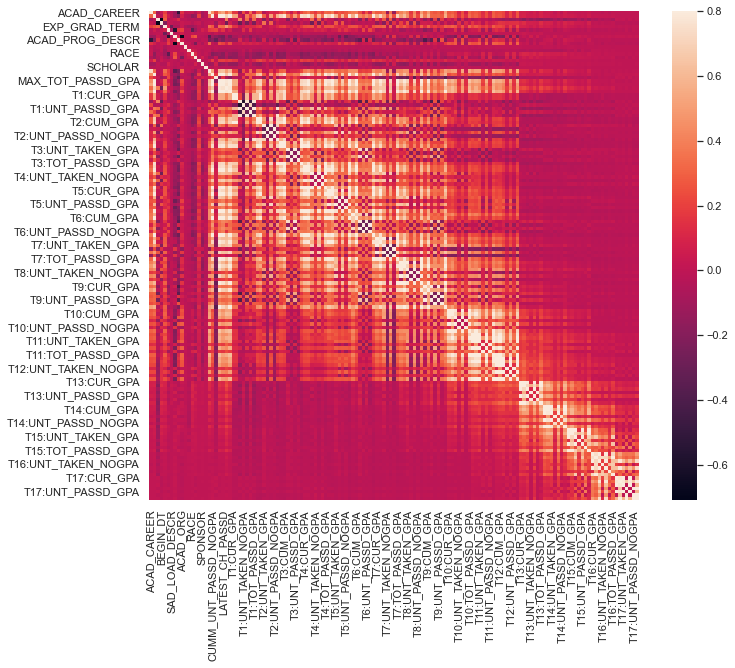

In [20]:
corrmat = df_drop_unuse.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

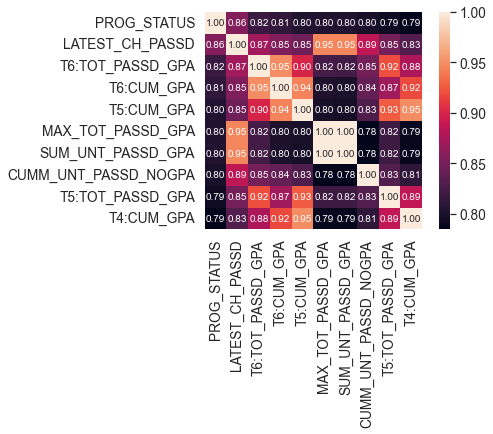

In [21]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'PROG_STATUS')['PROG_STATUS'].index
cm = np.corrcoef(df_drop_unuse[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [22]:
bins = [0.01, 2.5, 3.0, 3.5, 4]
labels = ['At-Risk', 'Risk', 'Low-Risk', 'Excellent']
df2['T1:CUR_GPA'] = pd.cut(x = df2['T1:CUR_GPA'], bins = bins, labels = labels, include_lowest = True)

In [23]:
df2['T1:CUR_GPA'] = le.fit_transform(df2['T1:CUR_GPA'].astype(str))
df2['T1:CUR_GPA']

0       4
1       0
2       2
3       0
4       4
5       3
6       0
7       0
8       4
9       3
10      0
11      3
12      0
13      2
14      3
15      1
16      3
17      2
18      0
19      0
20      2
21      1
22      3
23      3
24      2
25      4
26      4
27      0
28      0
29      3
30      0
31      0
32      0
33      2
34      0
35      2
36      0
37      3
38      0
39      3
40      0
41      3
42      4
43      3
44      3
45      0
46      2
47      4
48      3
49      4
50      0
51      4
52      4
53      0
54      0
55      4
56      1
57      0
58      0
59      2
60      3
61      3
62      3
63      0
64      1
65      3
66      0
67      3
68      0
69      0
70      0
71      0
72      4
73      0
74      1
75      0
76      1
77      0
78      4
79      1
80      3
81      4
82      0
83      3
84      2
85      3
86      3
87      3
88      0
89      0
90      0
91      0
92      4
93      1
94      0
95      1
96      0
97      0
98      0
99      0


In [24]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import imblearn
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
import csv
from sklearn.model_selection import cross_val_score

*Feature Selection*

154
---------Top 10----------
              Features  Score
71    T7:TOT_PASSD_GPA    1.0
48    T4:UNT_PASSD_GPA    1.0
55    T5:UNT_PASSD_GPA    1.0
54  T5:UNT_TAKEN_NOGPA    1.0
53    T5:UNT_TAKEN_GPA    1.0
52          T5:CUM_GPA    1.0
51          T5:CUR_GPA    1.0
50    T4:TOT_PASSD_GPA    1.0
49  T4:UNT_PASSD_NOGPA    1.0
81    T9:UNT_TAKEN_GPA    1.0
---------Bottom 10----------
                Features  Score
139    T17:UNT_PASSD_GPA   0.10
131  T16:UNT_TAKEN_NOGPA   0.07
133  T16:UNT_PASSD_NOGPA   0.07
141    T17:TOT_PASSD_GPA   0.07
13                  LOAN   0.00
135          T17:CUR_GPA   0.00
136          T17:CUM_GPA   0.00
137    T17:UNT_TAKEN_GPA   0.00
138  T17:UNT_TAKEN_NOGPA   0.00
140  T17:UNT_PASSD_NOGPA   0.00


c:\Users\about\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\about\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

NB acc=  94.36181818181818
DT acc=  98.2309090909091
KNN acc=  98.1940404040404
SVM acc=  96.39383838383839
RFC acc=  97.9657575757576
LOR acc=  97.87959595959596


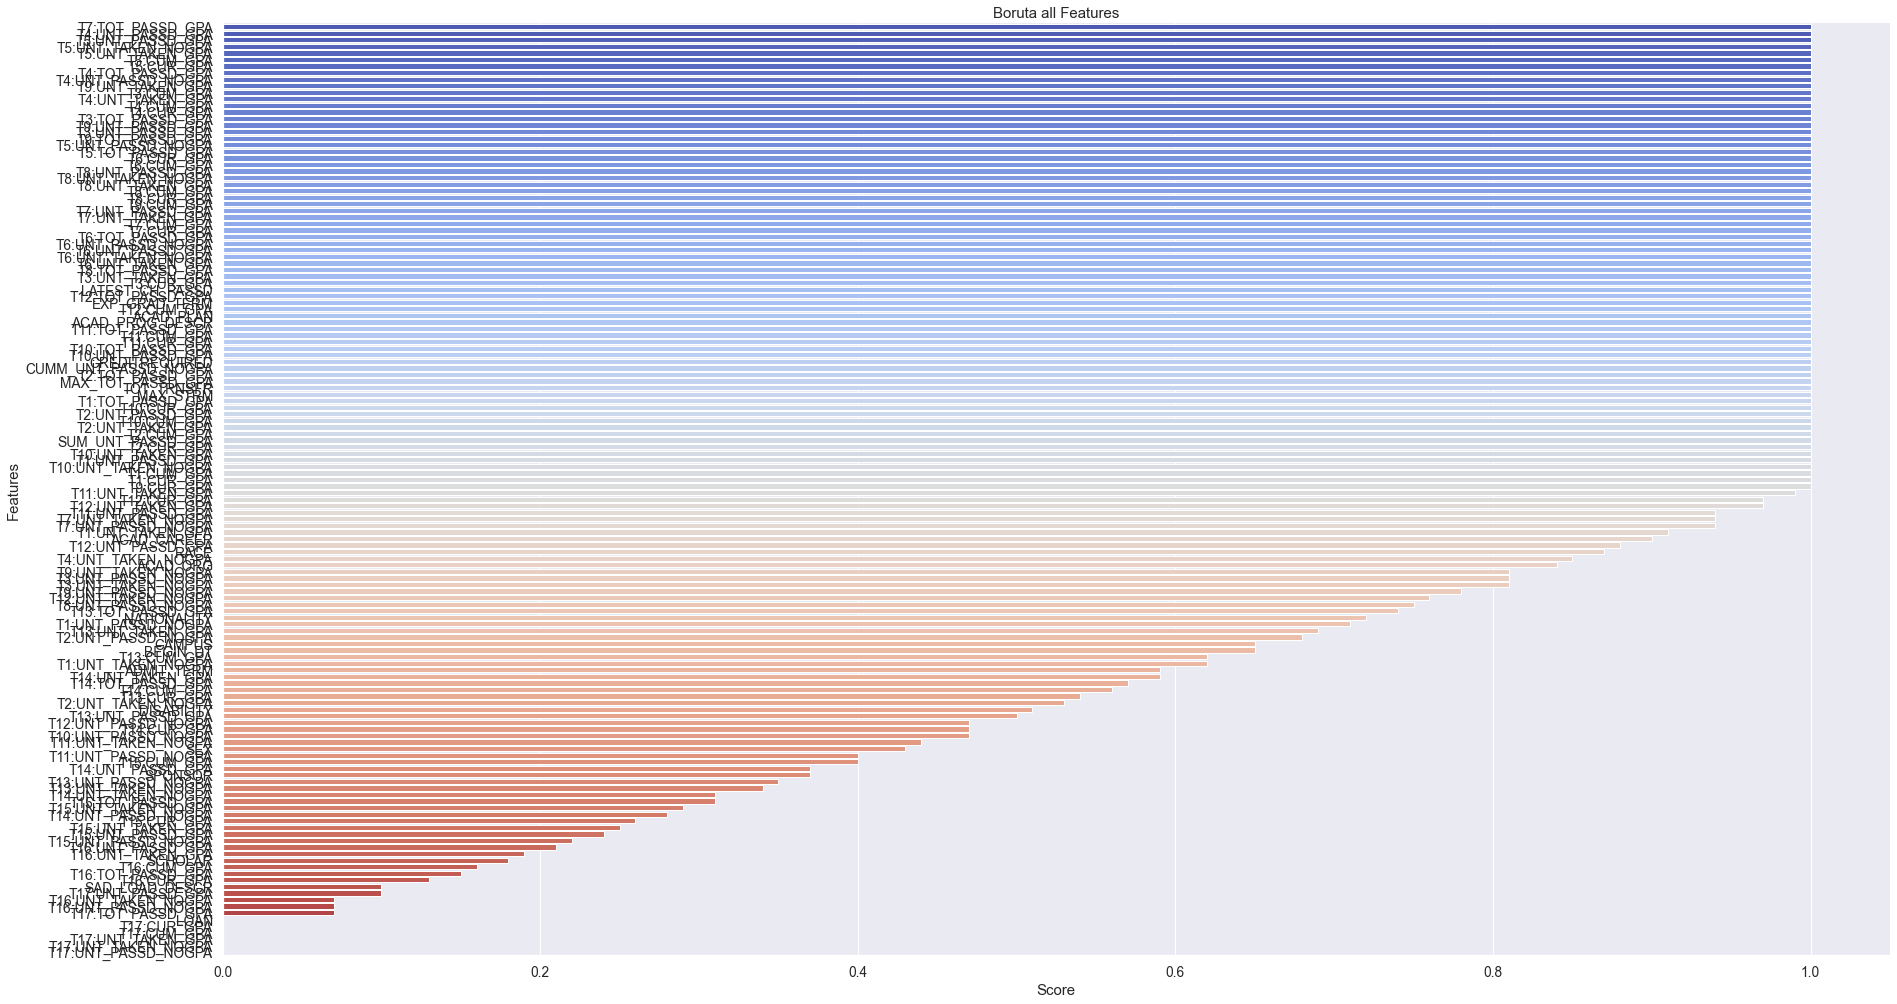

In [25]:
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

print(len(df2.columns))

y = df_drop_unuse.PROG_STATUS
X = df_drop_unuse.drop("PROG_STATUS", axis=1)
colnames = X.columns

model = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

feat_selector = BorutaPy(
    verbose=0,
    estimator=model,
    n_estimators='auto',
    max_iter=100  # number of iterations to perform
)



feat_selector.fit(X.values, y)

boruta_score = ranking(list(map(float, feat_selector.ranking_)), colnames, order=-1)
boruta_score = pd.DataFrame(list(boruta_score.items()), columns=['Features', 'Score'])
boruta_score = boruta_score.sort_values("Score", ascending = False)

print('---------Top 10----------')
print(boruta_score.head(10))

print('---------Bottom 10----------')
print(boruta_score.tail(10))

sns_boruta_plot = sns.catplot(x="Score", y="Features", data = boruta_score[:], kind = "bar", 
               height=14, aspect=1.9, palette='coolwarm')
plt.title("Boruta all Features")

model_list = ["NB", "DT", "KNN", "SVM", "RFC", "LOR"]
feature_num, acc_nb, acc_dt, acc_knn, acc_svm, acc_rfc, acc_lor = [], [], [], [], [], [], []

for i in range(1, 100):
    feature_num.append(i)
    for model in model_list:
        
        # Create X and y dataset
        
        y = df_drop_unuse.PROG_STATUS
        X = df_drop_unuse.drop("PROG_STATUS", axis=1)
        
        cols = boruta_score.Features.iloc[:]
        X = X[cols].copy()
        
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
        
        if model == "NB":
            clf = GaussianNB()
        elif model == "DT":
            clf = DecisionTreeClassifier(max_depth=3) 
        elif model == "KNN":
            clf = KNeighborsClassifier(n_neighbors=3)
        elif model == "SVM":
            clf = svm.SVC()
        elif model == 'RFC':
            clf = RandomForestClassifier(max_depth=3)
        elif model == 'LOR':
            clf = LogisticRegression(max_iter=200)
        
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        acc = round((accuracy_score(y_test, y_pred)*100), 2)
        
        if model == "NB":
            acc_nb.append(acc)
        elif model == "DT":
            acc_dt.append(acc) 
        elif model == "KNN":
            acc_knn.append(acc)
        elif model == "SVM":
            acc_svm.append(acc)
        elif model == "RFC":
            acc_rfc.append(acc)
        elif model == "LOR":
            acc_lor.append(acc) 
            
# your codes here...
boruta_acc_result = pd.DataFrame(list(zip(feature_num,
                                         acc_nb,
                                         acc_dt,
                                         acc_knn,
                                         acc_svm,
                                         acc_rfc,
                                         acc_lor)),
                                columns = ["No_Of_Features",
                                          "NB",
                                          "DT",
                                          "KNN",
                                          "SVM",
                                          "RFC",
                                          "LOR"])

print("NB acc= ",boruta_acc_result['NB'].mean())
print("DT acc= ",boruta_acc_result['DT'].mean())
print("KNN acc= ",boruta_acc_result['KNN'].mean())
print("SVM acc= ",boruta_acc_result['SVM'].mean())
print("RFC acc= ",boruta_acc_result['RFC'].mean())
print("LOR acc= ",boruta_acc_result['LOR'].mean())

boruta_acc_result = pd.melt(boruta_acc_result,
                           id_vars = "No_Of_Features",
                           var_name = "Model",
                           value_name = "Accuracy")

<AxesSubplot: >

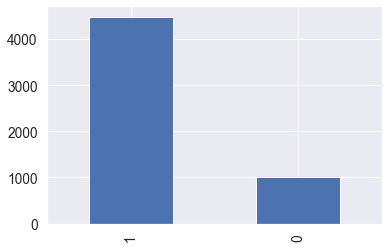

In [26]:
df_drop_unuse['PROG_STATUS'].value_counts().plot(kind='bar')


*Modelling and Model Evaluation*

1    4482
0    1006
Name: PROG_STATUS, dtype: int64
0    4482
1    4482
Name: PROG_STATUS, dtype: int64
rf_SMOTE Accuracy Score: 0.9846050870147256
svc_SMOTE Accuracy Score: 0.9419901829540384
kn_SMOTE Accuracy Score: 0.9830432842481035
DecisionTree_SMOTE Accuracy Score: 0.9825970548862115
gnb_SMOTE Accuracy Score: 0.9520303435966087


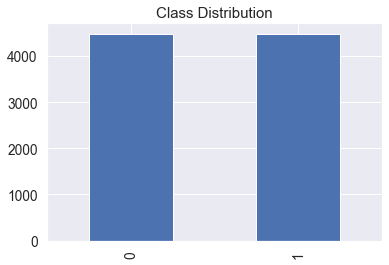

In [27]:
print(df_drop_unuse["PROG_STATUS"].value_counts())
df_drop_unuse["PROG_STATUS"].value_counts().plot(kind="bar")
plt.title("Class Distribution")

smt = imblearn.over_sampling.SMOTE(sampling_strategy="auto", random_state=42, k_neighbors=5)
X = df_drop_unuse.drop("PROG_STATUS", axis=1)
y = df_drop_unuse["PROG_STATUS"]
features = X.columns

X_res, y_res = smt.fit_resample(X, y)

print(y_res.value_counts())
y_res.value_counts().plot(kind="bar")
plt.title("Class Distribution")

#-------------------------------------------------------------

#split SMOTE data in XY
y = y_res
X = X_res

cols = boruta_score.Features.iloc[:]
X = X[cols].copy()

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)

#-------------------------------------------------------------

#Train and do prediction with default parameter
#RandomForest
rf_SMOTE = RandomForestClassifier()
rf_SMOTE.fit(X_train, y_train)
ypred = rf_SMOTE.predict(X_test)
print("rf_SMOTE Accuracy Score:", accuracy_score(y_test, ypred))

#SVM
svc_SMOTE = SVC(kernel='rbf')
svc_SMOTE.fit(X_train, y_train)
ypred = svc_SMOTE.predict(X_test)
print("svc_SMOTE Accuracy Score:", accuracy_score(y_test, ypred))

#knn
kn_SMOTE = KNeighborsClassifier()
kn_SMOTE.fit(X_train, y_train)
ypred = kn_SMOTE.predict(X_test)
print("kn_SMOTE Accuracy Score:", accuracy_score(y_test, ypred))

#Decission Tree
dtc_SMOTE = DecisionTreeClassifier()
dtc_SMOTE.fit(X_train, y_train)
ypred = dtc_SMOTE.predict(X_test)
print("DecisionTree_SMOTE Accuracy Score:", accuracy_score(y_test, ypred))

#GaussianNB
gnb_SMOTE = GaussianNB()
gnb_SMOTE.fit(X_train, y_train)
ypred = gnb_SMOTE.predict(X_test)
print("gnb_SMOTE Accuracy Score:", accuracy_score(y_test, ypred))

*Hyper parameter*

In [28]:
criterion = ['gini','entropy']
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'criterion':criterion,
               'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)
print(rf_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Users\about\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


{'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 90, 'criterion': 'entropy', 'bootstrap': False}


c:\Users\about\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


rf_SMOTE(Hyperparameter) Accuracy Score: 0.9897367246764837
rf_SMOTE(Hyperparameter) ROC Score: 0.9988846747075768
rf_SMOTE(Hyperparameter) Precision Score: 0.9918367346938776
rf_SMOTE(Hyperparameter) F1 Score: 0.9895927601809955


c:\Users\about\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\about\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\about\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

rf_SMOTE(Hyperparameter) CV Score: [0.99386503 0.99219186 0.89124373 0.98996096 0.9921875 ]
tree_clas_SMOTE(Hyperparameter) Recall: 0.9873589164785553


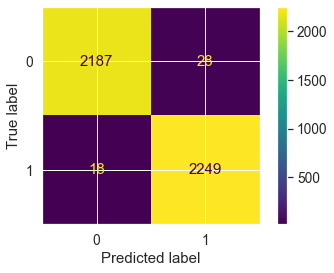

In [29]:
k_folds = KFold(n_splits = 5)

rf_SMOTE = RandomForestClassifier(n_estimators= 1000,
 min_samples_split= 2,
 min_samples_leaf= 1,
 max_features= 'auto',
 max_depth= None,
 criterion= 'entropy',
 bootstrap= False)
rf_SMOTE.fit(X_train, y_train)
ypred = rf_SMOTE.predict(X_test)


print("rf_SMOTE(Hyperparameter) Accuracy Score:", accuracy_score(y_test, ypred))
print("rf_SMOTE(Hyperparameter) ROC Score:", roc_auc_score(y_test, rf_SMOTE.predict_proba(X_test)[:,1]))
print("rf_SMOTE(Hyperparameter) Precision Score:", precision_score(y_test, ypred, average="binary", pos_label=0))
print("rf_SMOTE(Hyperparameter) F1 Score:", f1_score(y_test, ypred, average="binary", pos_label=0))
print("rf_SMOTE(Hyperparameter) CV Score:", cross_val_score(rf_SMOTE, X, y, cv = k_folds))
print("tree_clas_SMOTE(Hyperparameter) Recall:", recall_score(y_test, ypred, average="binary", pos_label=0))
ConfusionMatrixDisplay.from_predictions(y_test, ypred)
plt.show()

In [30]:
#Find Hyperparameter for SVM
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

print(grid.best_estimator_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ..................................C=0.1, kernel=rbf; total time=   5.2s
[CV] END ..................................C=0.1, kernel=rbf; total time=   5.1s
[CV] END ..................................C=0.1, kernel=rbf; total time=   5.3s
[CV] END ..................................C=0.1, kernel=rbf; total time=   4.7s
[CV] END ..................................C=0.1, kernel=rbf; total time=   5.4s
[CV] END .................................C=0.1, kernel=poly; total time=   2.9s
[CV] END .................................C=0.1, kernel=poly; total time=   3.0s
[CV] END .................................C=0.1, kernel=poly; total time=   3.1s
[CV] END .................................C=0.1, kernel=poly; total time=   3.3s
[CV] END .................................C=0.1, kernel=poly; total time=   2.2s
[CV] END ..............................C=0.1, kernel=sigmoid; total time=   4.2s
[CV] END ..............................C=0.1, ke

svc_SMOTE(Hyperparameter) Accuracy Score: 0.9596162427487729
svc_SMOTE(Hyperparameter) Precision Score: 0.9673713235294118
svc_SMOTE(Hyperparameter) F1 Score: 0.9587793213391027
rf_SMOTE(Hyperparameter) CV Score: [0.97322922 0.95259342 0.09871723 0.93641941 0.93582589]
tree_clas_SMOTE(Hyperparameter) Recall: 0.9503386004514672


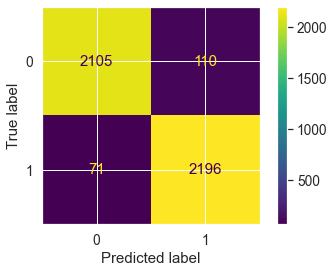

In [31]:
svc_SMOTE = SVC(kernel='poly',C=100)
svc_SMOTE.fit(X_train, y_train)
ypred = svc_SMOTE.predict(X_test)
print("svc_SMOTE(Hyperparameter) Accuracy Score:", accuracy_score(y_test, ypred))

print("svc_SMOTE(Hyperparameter) Precision Score:", precision_score(y_test, ypred, average="binary", pos_label=0))
print("svc_SMOTE(Hyperparameter) F1 Score:", f1_score(y_test, ypred, average="binary", pos_label=0))
print("rf_SMOTE(Hyperparameter) CV Score:", cross_val_score(svc_SMOTE, X, y, cv = k_folds))
print("tree_clas_SMOTE(Hyperparameter) Recall:", recall_score(y_test, ypred, average="binary", pos_label=0))
ConfusionMatrixDisplay.from_predictions(y_test, ypred)
plt.show()

In [32]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid.fit(X_train,y_train)

print(grid.best_params_)

accuracy = grid.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy))

Fitting 10 folds for each of 30 candidates, totalling 300 fits
{'n_neighbors': 1}
Accuracy for our training dataset with tuning is : 98.77%


knn_SMOTE(Hyperparameter) Accuracy for our testing dataset with tuning is : 0.9892904953145917
knn_SMOTE(Hyperparameter) Accuracy Score: 0.9892904953145917
knn_SMOTE(Hyperparameter) ROC Score: 0.989335654064948
knn_SMOTE(Hyperparameter) Precision Score: 0.9852216748768473
knn_SMOTE(Hyperparameter) F1 Score: 0.9892086330935251
knn_SMOTE(Hyperparameter) CV Score: [0.96765198 0.85164529 0.13162298 0.99442276 0.99832589]
tree_clas_SMOTE(Hyperparameter) Recall: 0.9932279909706546


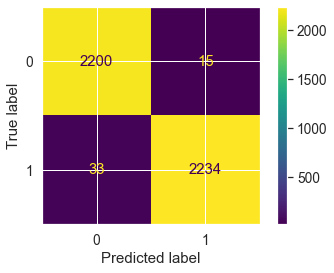

In [33]:
knn_SMOTE = KNeighborsClassifier(n_neighbors=1)
knn_SMOTE.fit(X_train,y_train)
ypred=knn_SMOTE.predict(X_test) 
accuracy=accuracy_score(y_test,ypred)
print("knn_SMOTE(Hyperparameter) Accuracy for our testing dataset with tuning is :",accuracy )
print("knn_SMOTE(Hyperparameter) Accuracy Score:", accuracy_score(y_test, ypred))
print("knn_SMOTE(Hyperparameter) ROC Score:", roc_auc_score(y_test, knn_SMOTE.predict_proba(X_test)[:,1]))
print("knn_SMOTE(Hyperparameter) Precision Score:", precision_score(y_test, ypred, average="binary", pos_label=0))
print("knn_SMOTE(Hyperparameter) F1 Score:", f1_score(y_test, ypred, average="binary", pos_label=0))
print("knn_SMOTE(Hyperparameter) CV Score:", cross_val_score(knn_SMOTE, X, y, cv = k_folds))
print("tree_clas_SMOTE(Hyperparameter) Recall:", recall_score(y_test, ypred, average="binary", pos_label=0))
ConfusionMatrixDisplay.from_predictions(y_test, ypred)
plt.show()

In [34]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_clas_SMOTE = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas_SMOTE, param_grid=param_grid, cv=5, verbose=1)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


c:\Users\about\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\about\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\about\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\about\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and

{'ccp_alpha': 0.001, 'criterion': 'gini', 'max_depth': 9, 'max_features': 'auto'}


c:\Users\about\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


tree_clas_SMOTE(Hyperparameter) Accuracy Score: 0.9821508255243195
tree_clas_SMOTE(Hyperparameter) ROC Score: 0.9821846674386949
tree_clas_SMOTE(Hyperparameter) Precision Score: 0.9789143113503813
tree_clas_SMOTE(Hyperparameter) F1 Score: 0.9819981998199819
tree_clas_SMOTE(Hyperparameter) CV Score: [0.9771333  0.9771333  0.71556051 0.98047964 0.97991071]
tree_clas_SMOTE(Hyperparameter) Recall: 0.9851015801354401


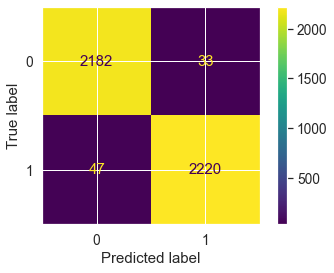

In [35]:
param_grid = {'max_features': 'auto',
              'ccp_alpha': 0.001,
              'max_depth' : 8,
              'criterion' :'entropy'
             }
tree_clas_SMOTE = DecisionTreeClassifier(random_state=1024)
tree_clas_SMOTE.fit(X_train, y_train)
ypred = tree_clas_SMOTE.predict(X_test)
print("tree_clas_SMOTE(Hyperparameter) Accuracy Score:", accuracy_score(y_test, ypred))
print("tree_clas_SMOTE(Hyperparameter) ROC Score:", roc_auc_score(y_test, tree_clas_SMOTE.predict_proba(X_test)[:,1]))
print("tree_clas_SMOTE(Hyperparameter) Precision Score:", precision_score(y_test, ypred, average="binary", pos_label=0))
print("tree_clas_SMOTE(Hyperparameter) F1 Score:", f1_score(y_test, ypred, average="binary", pos_label=0))
print("tree_clas_SMOTE(Hyperparameter) CV Score:", cross_val_score(tree_clas_SMOTE, X, y, cv = k_folds))
print("tree_clas_SMOTE(Hyperparameter) Recall:", recall_score(y_test, ypred, average="binary", pos_label=0))
ConfusionMatrixDisplay.from_predictions(y_test, ypred)

plt.show()

*Stacking Ensemble*

In [36]:
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

In [37]:
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('cart', DecisionTreeClassifier(max_features= 'auto', ccp_alpha= 0.001, max_depth= 8,criterion= 'entropy')))
    level0.append(('rf', RandomForestClassifier(n_estimators= 1000,
 min_samples_split= 2,
 min_samples_leaf= 1,
 max_features= 'auto',
 max_depth= None,
 criterion= 'entropy',
 bootstrap= False)))   
    level0.append(('knn', KNeighborsClassifier(n_neighbors=1)))
    
    # define the stacking ensemble
       
    level1 = GaussianNB()     
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
        
    
    return model

In [38]:
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
models = dict()
# your codes here...
models['cart'] = DecisionTreeClassifier(max_features= 'auto',
              ccp_alpha= 0.001,
              max_depth= 8,
              criterion= 'entropy')

models['knn']= KNeighborsClassifier(n_neighbors=1)

models['rf'] = RandomForestClassifier(n_estimators= 1000,
 min_samples_split= 2,
 min_samples_leaf= 1,
 max_features= 'auto',
 max_depth= None,
 criterion= 'entropy',
 bootstrap= False)

models['stacking'] = get_stacking()

In [39]:
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
    return scores

>cart 0.968 (0.006)
>knn 0.994 (0.003)
>rf 0.994 (0.003)
>stacking 0.990 (0.004)


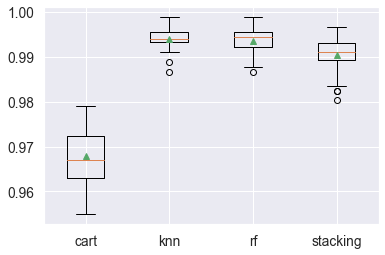

In [40]:
from numpy import mean
from numpy import std
results, names = list(), list()
for name, model in models.items():
    scores =evaluate_model(model,X,y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name,mean(scores),std(scores)))

# plot model performance for comparison - based on f1-score
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [41]:
boruta_score.Features.iloc[:]

71         T7:TOT_PASSD_GPA
48         T4:UNT_PASSD_GPA
55         T5:UNT_PASSD_GPA
54       T5:UNT_TAKEN_NOGPA
53         T5:UNT_TAKEN_GPA
52               T5:CUM_GPA
51               T5:CUR_GPA
50         T4:TOT_PASSD_GPA
49       T4:UNT_PASSD_NOGPA
81         T9:UNT_TAKEN_GPA
38               T3:CUM_GPA
46         T4:UNT_TAKEN_GPA
45               T4:CUM_GPA
44               T4:CUR_GPA
43         T3:TOT_PASSD_GPA
83         T9:UNT_PASSD_GPA
41         T3:UNT_PASSD_GPA
85         T9:TOT_PASSD_GPA
56       T5:UNT_PASSD_NOGPA
57         T5:TOT_PASSD_GPA
58               T6:CUR_GPA
59               T6:CUM_GPA
76         T8:UNT_PASSD_GPA
75       T8:UNT_TAKEN_NOGPA
74         T8:UNT_TAKEN_GPA
73               T8:CUM_GPA
72               T8:CUR_GPA
80               T9:CUM_GPA
69         T7:UNT_PASSD_GPA
67         T7:UNT_TAKEN_GPA
66               T7:CUM_GPA
65               T7:CUR_GPA
64         T6:TOT_PASSD_GPA
63       T6:UNT_PASSD_NOGPA
62         T6:UNT_PASSD_GPA
61       T6:UNT_TAKE